# Importing OAT

In [1]:
from OAT import *

dataset_path = r"data\vector_analysis\simple_rotation_x15"

## Data in OAT

Basically, there are 2 pandas dataframes where data are stored.
- df refers to the dataframe which contains data for each spots such as coordinates, displacement vectors, ...
- data refers to the one which contains data at the time point level such as drift, volume, rotation axis, ...

## Importing the dataset

There are 3 ways to import data in OAT for the vector analysis:
- load_from_trackmate import 2 specific .csv files generated by trackmate.
- load_from_quickPIV import .vtk files generated by quickPIV.
- load_from_csv import .csv file(s)

Here, the demo dataset is in the trackmate format.

In [2]:
help(vectors.load_from_trackmate)

Help on function load_from_trackmate in module modules.vectors:

load_from_trackmate(dirpath, rescaling=[1, 1, 1], filtering=False)
    Load the csv files that have been generated by Trackmate.
    The expected files are the tracks>spots csv and tracks>edges csv.
    Returns a pandas dataframe containing coordinates, 
    displacement vectors as well as clustering information if filtering
    have been set to True.
    
    Parameters
    ----------
    dirpath : str
        Path to the folder containing csv files.
    rescaling : list, optional
        Rescaling factors by axis : [x, y, z]. The default is [1, 1, 1].
    filtering : bool, optional
        If True, cluster the spots to remove those that are not part of the
        organoid. 
        The default is False.
    
    Returns
    -------
    df : pandas.DataFrame
        Dataframe containing merged informations of both csv files.
        Can be used for the next part of the pipeline.



### Loading the dataset as a dataframe that works with OAT

In [3]:
df = vectors.load_from_trackmate(dataset_path)
df.head()

Opening files ... Done ! (0.1s)
Computing displacement vectors ... Done ! (4.52s)


TRACK_ID  QUALITY                                              COORD  TP  \
ID0         0      0.0                              [-76.0, 116.0, -51.0]   0   
ID1         1      0.0  [-80.17113560587966, 115.59798994974877, -47.1...   0   
ID2         2      0.0  [-75.30237142257698, 115.19597989949747, -58.9...   0   
ID3         3      0.0  [-70.06880068856033, 114.79396984924622, -43.2...   0   
ID4         4      0.0  [-87.05589988605506, 114.39195979899498, -52.9...   0   

    TARGET                                       DISP_VECT  
ID0  ID200   [0.0, -1.3629669484372755, 10.35276180410083]  
ID1  ID201   [0.0, -2.338242732023744, 10.118513057013544]  
ID2  ID202    [0.0, 0.7218124552243239, 10.41552571082839]  
ID3  ID203   [0.0, -3.3241481572747063, 9.777013636711033]  
ID4  ID204  [0.0, -0.8020192369520913, 10.003206953967286]

Here is a quick explanation on what column is what :
- TRACK_ID : ID of the track the spot is part of.
- QUALITY : Quality index of the spot given by trackmate.
- COORD : coordinates of the spot.
- TP : time point the spot is at.
- TARGET : next spot ID in the track, i.e., the next position of the cell.
- DISP_VECT : Displacement vector between the spot and its target.

## Computing a full analysis on the dataset

### Looking at the documentation

In [4]:
help(vectors.full_analysis)

Help on function full_analysis in module modules.vectors:

full_analysis(df)
    Run a full analysis on the vectors of the dataset.
    
    Parameters
    ----------
    df : pandas.DataFrame
        Dataframe loaded using the provided methods of OAT.
    
    Returns
    -------
    df : pandas.DataFrame
        Dataframe with informations per spots.
    data : pandas.DataFrame
        Dataframe with informations per time points.



The full_analysis method allows you to directly compute the vector analysis on the dataframe. It can be usefull if you already have a dataframe that can work with OAT. It basically allows you to bypass the import part. By comparison, this it not possible with the basic use of OAT.
But, you don't have much more control on parameters which could be usefull. For that, you need to call directly the methods full_analysis is also calling.

Those methods come with a check of what data you are inputing because some need specific data computed by another method.
The required data is specified in the given method documentation, but, as a quick overview, this is the order used in full_analysis :
- get_drift()
- get_volume()
- get_translated_coords()
- get_rotation_axis()
- get_aligned_rotation()
- get_angular_velocity()


### Computing the drift

In [5]:
data = vectors.get_drift(df)
data.head()

Computing drift ... Done ! (0.05s)


CENTROID CLUST_CENTROID DRIFT  \
0     [-76.02279037565256, 76.0, -51.00080482740321]            NaN   0.0   
1  [-76.02279037565256, 76.00020830465998, -51.00...            NaN   0.0   
2  [-76.02279037565256, 76.00040241370161, -51.00...            NaN   0.0   
3  [-76.02279037565256, 76.00056909891448, -51.00...            NaN   0.0   
4  [-76.02279037565256, 76.00069700097684, -51.00...            NaN   0.0   

                                          DRIFT_VECT  
0  [0.0, 0.00020830465997789815, 2.74238287616412...  
1  [0.0, 0.00019410904162953102, 8.04025976108846...  
2  [0.0, 0.00016668521287499516, 0.00012790206233...  
3  [0.0, 0.00012790206235990809, 0.00016668521288...  
4  [0.0, 8.040259761799007e-05, 0.000194109041636...

### Computing volume
Some methods do not strictly need one of the 2 dataframes. For example, get_volume() does not require data to work. But, if you give it, the results of the method is added to the dataframe.

In [6]:
test = vectors.get_volume(df)
test.head()

Computing volume and radius ... Done ! (0.12s)


VOLUME  RADIUS
0  260130.21    39.6
1  260130.21    39.6
2  260130.21    39.6
3  260130.21    39.6
4  260130.21    39.6

In [7]:
data = vectors.get_volume(df, data)
data.head()

Computing volume and radius ... Done ! (0.16s)


CENTROID CLUST_CENTROID DRIFT  \
0     [-76.02279037565256, 76.0, -51.00080482740321]            NaN   0.0   
1  [-76.02279037565256, 76.00020830465998, -51.00...            NaN   0.0   
2  [-76.02279037565256, 76.00040241370161, -51.00...            NaN   0.0   
3  [-76.02279037565256, 76.00056909891448, -51.00...            NaN   0.0   
4  [-76.02279037565256, 76.00069700097684, -51.00...            NaN   0.0   

                                          DRIFT_VECT     VOLUME  RADIUS  
0  [0.0, 0.00020830465997789815, 2.74238287616412...  260130.21    39.6  
1  [0.0, 0.00019410904162953102, 8.04025976108846...  260130.21    39.6  
2  [0.0, 0.00016668521287499516, 0.00012790206233...  260130.21    39.6  
3  [0.0, 0.00012790206235990809, 0.00016668521288...  260130.21    39.6  
4  [0.0, 8.040259761799007e-05, 0.000194109041636...  260130.21    39.6

Here, test do not contains other informations while data does.

### Computing centered coordinates
This is just a basic translation of the spots in such as the centroid is translated to (0, 0, 0).

In [8]:
df, data = vectors.get_translated_coords(df, data)
df.head()

Translating coordinates to the center ... Done ! (0.33s)


TRACK_ID  QUALITY                                              COORD  TP  \
ID0         0      0.0                              [-76.0, 116.0, -51.0]   0   
ID1         1      0.0  [-80.17113560587966, 115.59798994974877, -47.1...   0   
ID2         2      0.0  [-75.30237142257698, 115.19597989949747, -58.9...   0   
ID3         3      0.0  [-70.06880068856033, 114.79396984924622, -43.2...   0   
ID4         4      0.0  [-87.05589988605506, 114.39195979899498, -52.9...   0   

    TARGET                                       DISP_VECT  \
ID0  ID200   [0.0, -1.3629669484372755, 10.35276180410083]   
ID1  ID201   [0.0, -2.338242732023744, 10.118513057013544]   
ID2  ID202    [0.0, 0.7218124552243239, 10.41552571082839]   
ID3  ID203   [0.0, -3.3241481572747063, 9.777013636711033]   
ID4  ID204  [0.0, -0.8020192369520913, 10.003206953967286]   

                                          CENTRD_COORD  
ID0  [0.022790375652562034, 40.0, 0.000804827403207...  
ID1  [-4.148345230227093, 39.597989949748765, 3.821...  
ID2  [0.7204189530755798, 39.19597989949747, -7.948...  
ID3  [5.953989687092232, 38.793969849246224, 7.7370...  
ID4  [-11.033109510402497, 38.391959798994975, -1.9...

#### Checking data

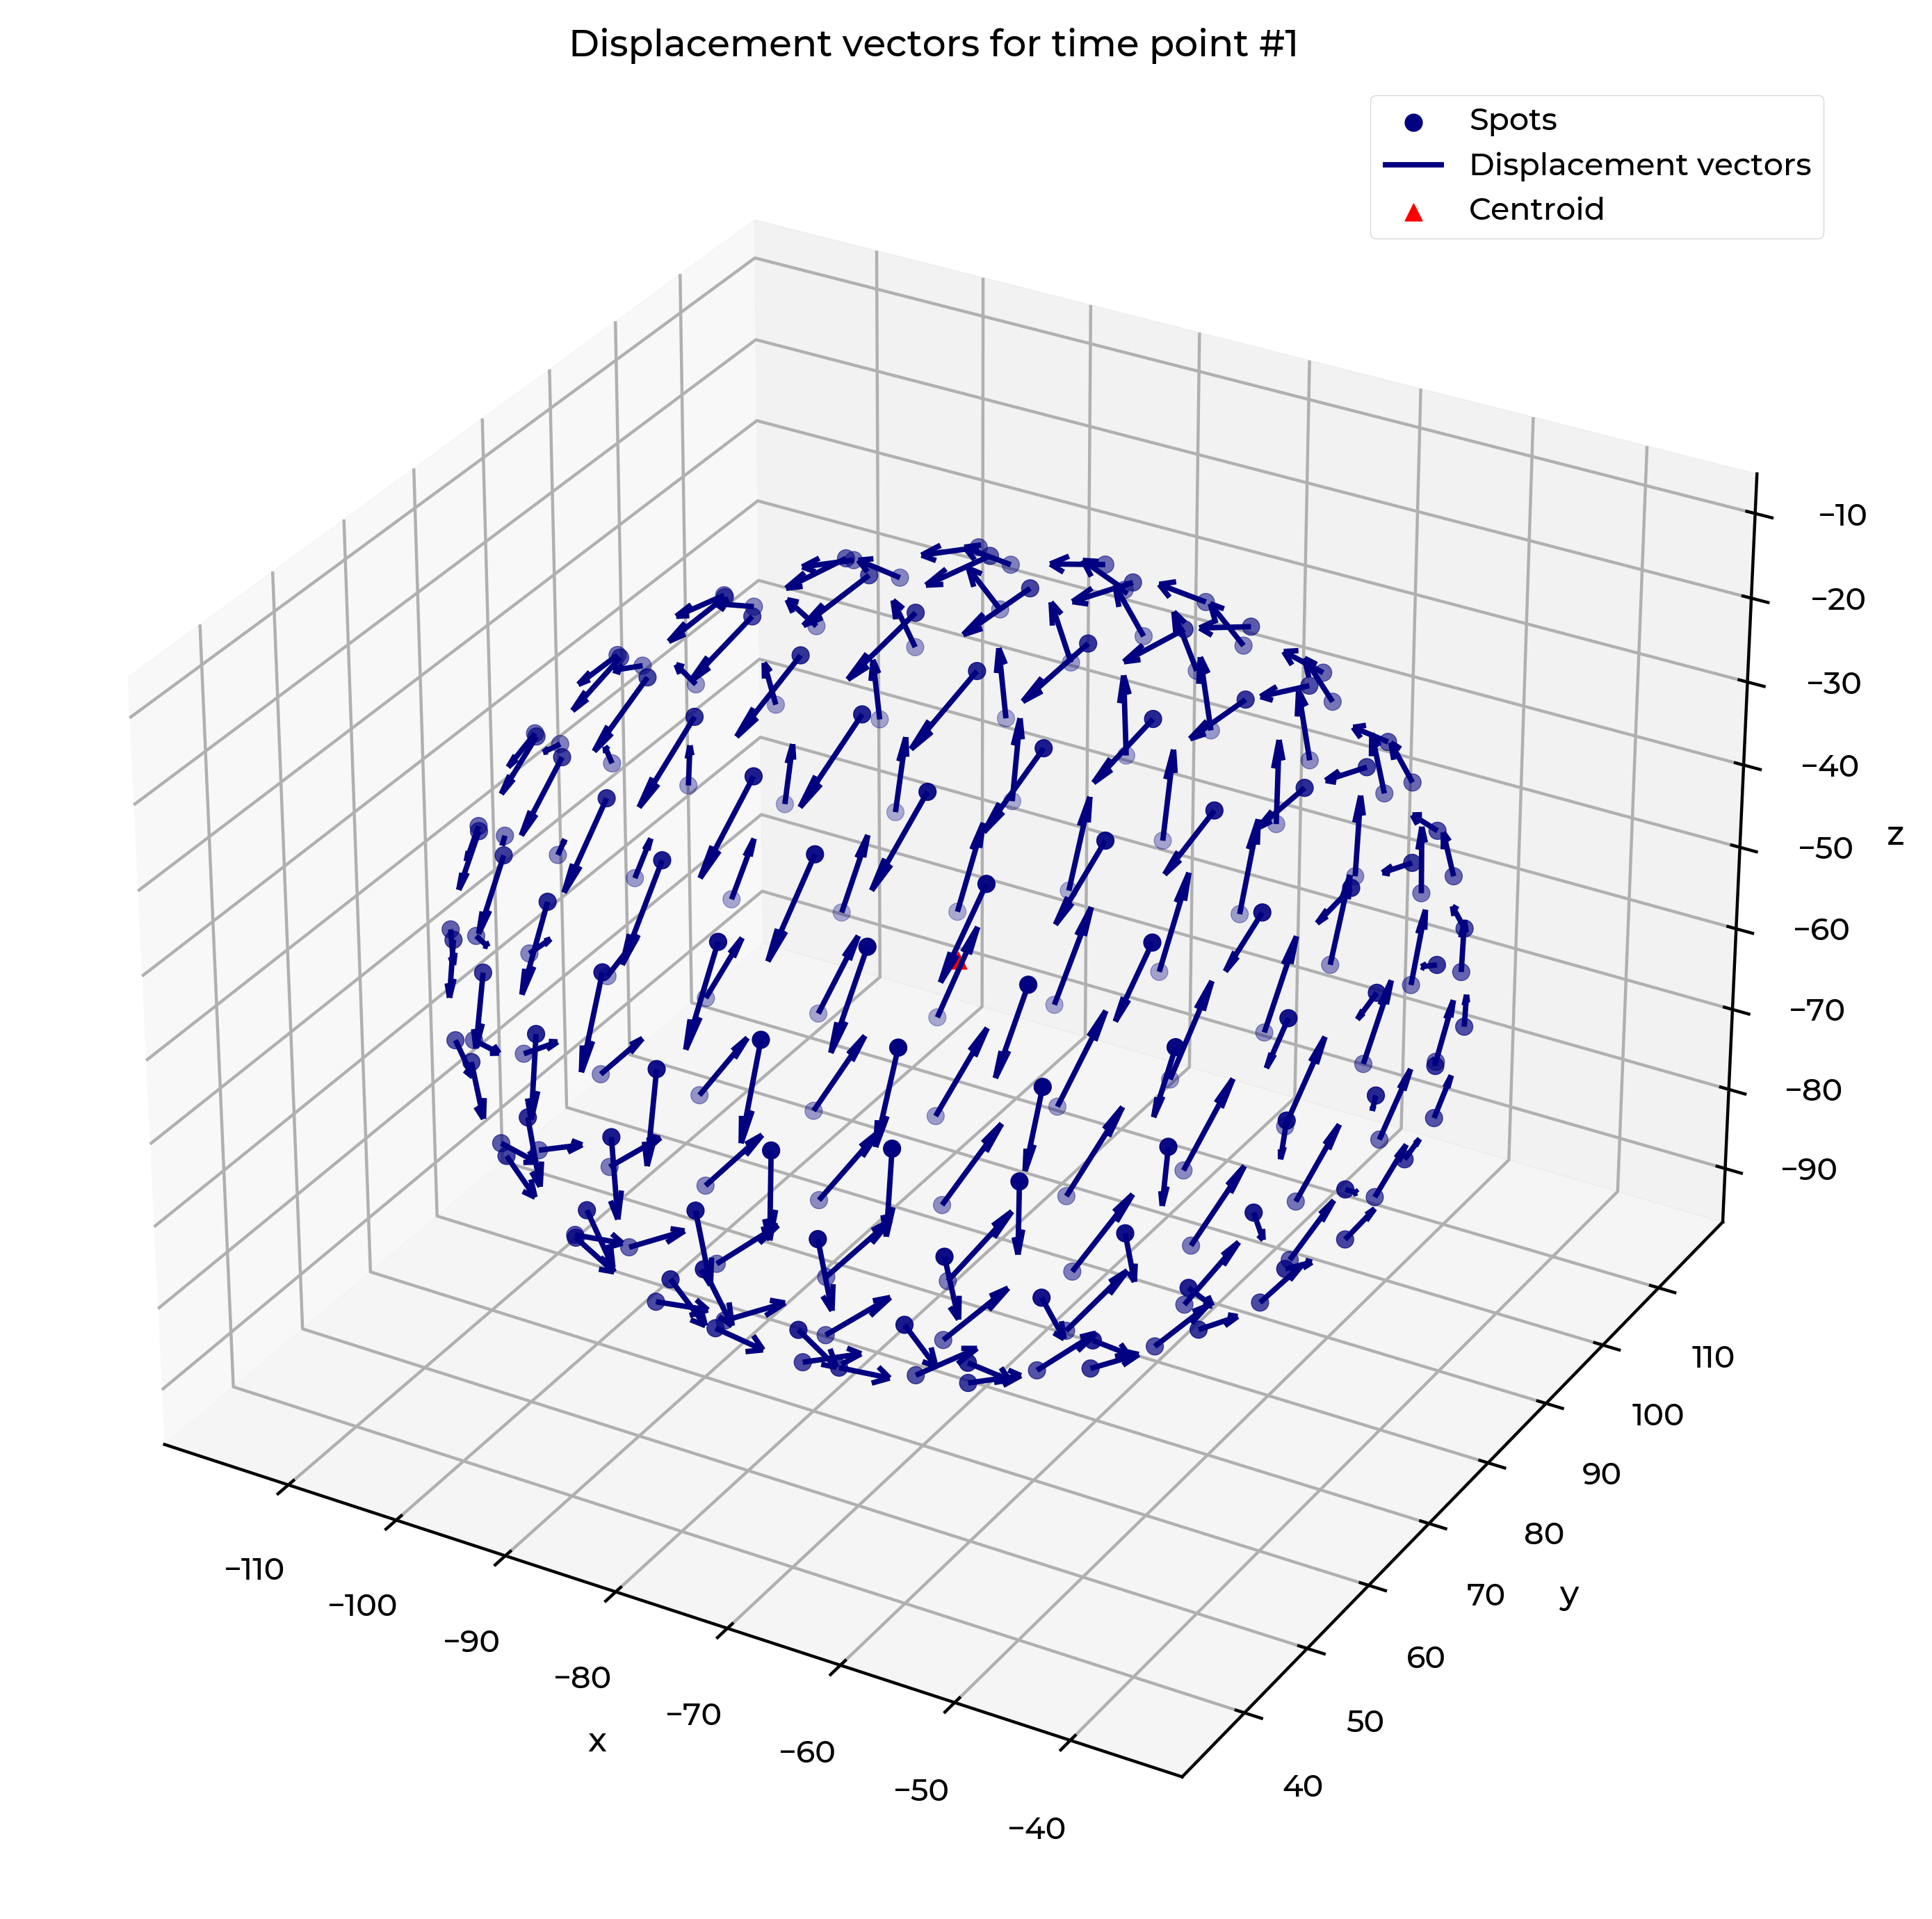

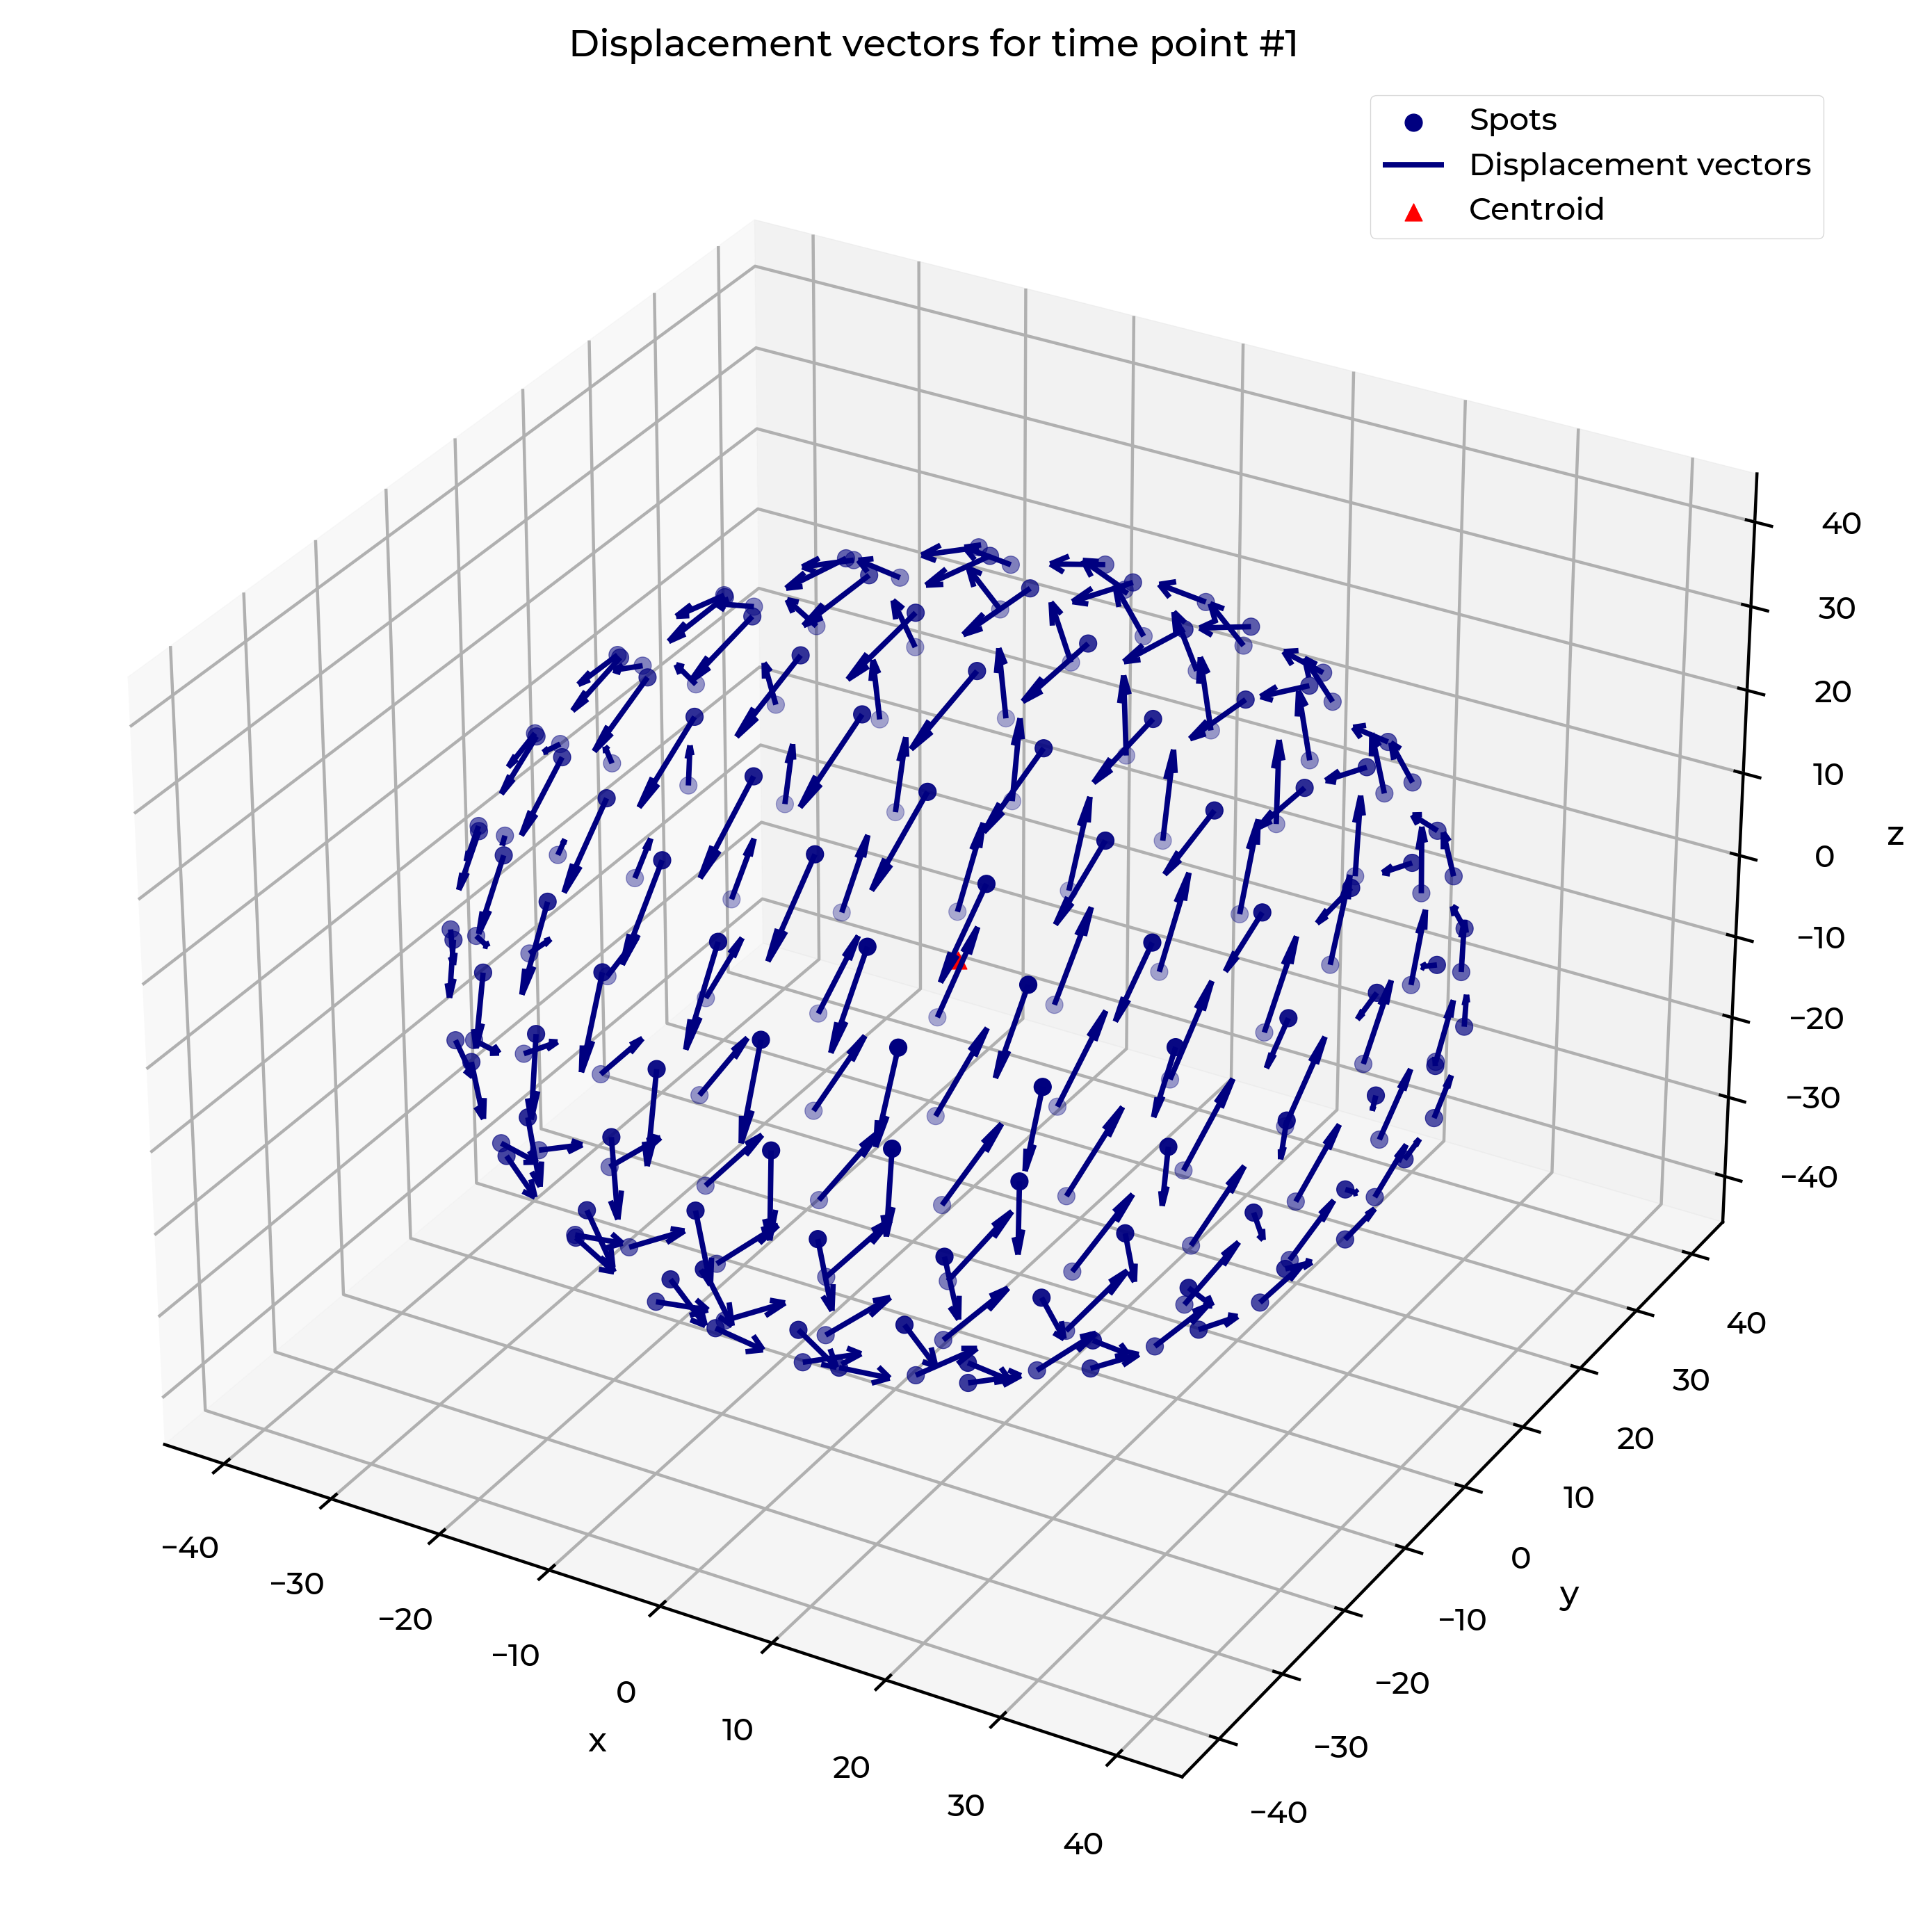

In [9]:
figures.show_data(df, TP = 1, data = data, mode = "default")
figures.show_data(df, TP = 1, data = data, mode = "centered")

The shape has not changed but the centroid is now at (0, 0, 0)

### Computing the rotation axis


In [10]:
data = vectors.get_rotation_axis(df, data)
data.head()

Computing the axis of rotations ... Done ! (0.11s)


CENTROID CLUST_CENTROID DRIFT  \
0     [-76.02279037565256, 76.0, -51.00080482740321]            NaN   0.0   
1  [-76.02279037565256, 76.00020830465998, -51.00...            NaN   0.0   
2  [-76.02279037565256, 76.00040241370161, -51.00...            NaN   0.0   
3  [-76.02279037565256, 76.00056909891448, -51.00...            NaN   0.0   
4  [-76.02279037565256, 76.00069700097684, -51.00...            NaN   0.0   

                                          DRIFT_VECT     VOLUME  RADIUS  \
0  [0.0, 0.00020830465997789815, 2.74238287616412...  260130.21    39.6   
1  [0.0, 0.00019410904162953102, 8.04025976108846...  260130.21    39.6   
2  [0.0, 0.00016668521287499516, 0.00012790206233...  260130.21    39.6   
3  [0.0, 0.00012790206235990809, 0.00016668521288...  260130.21    39.6   
4  [0.0, 8.040259761799007e-05, 0.000194109041636...  260130.21    39.6   

   CENTRD_CENTROID                                              V1  \
0  [0.0, 0.0, 0.0]  [0.0, -0.1615554882496425, 0.9868636299998189]   
1  [0.0, 0.0, 0.0]  [0.0, -0.4114697208420325, 0.9114234300423595]   
2  [0.0, 0.0, 0.0]  [0.0, -0.6333429719448985, 0.7738712295259488]   
3  [0.0, 0.0, 0.0]  [0.0, -0.8120549461584715, 0.5835809836000165]   
4  [0.0, 0.0, 0.0]  [0.0, -0.9354267177755822, 0.3535206580549452]   

                                                  V2  \
0   [-0.0, -0.9868636299998189, -0.1615554882496426]   
1   [-0.0, -0.9114234300423595, -0.4114697208420326]   
2   [-0.0, -0.7738712295259489, -0.6333429719448984]   
3   [-0.0, -0.5835809836000165, -0.8120549461584712]   
4  [-0.0, -0.35352065805494526, -0.9354267177755821]   

                           RA_VECT  
0  [0.9999999999999999, 0.0, -0.0]  
1                 [1.0, 0.0, -0.0]  
2  [1.0000000000000002, 0.0, -0.0]  
3  [1.0000000000000004, 0.0, -0.0]  
4                 [1.0, 0.0, -0.0]

V1 and V2 are the 2 vectors formaing the PCA plane for each time point. 
RA_VECT is the colinear vector to the axis of rotation.

#### Checking data

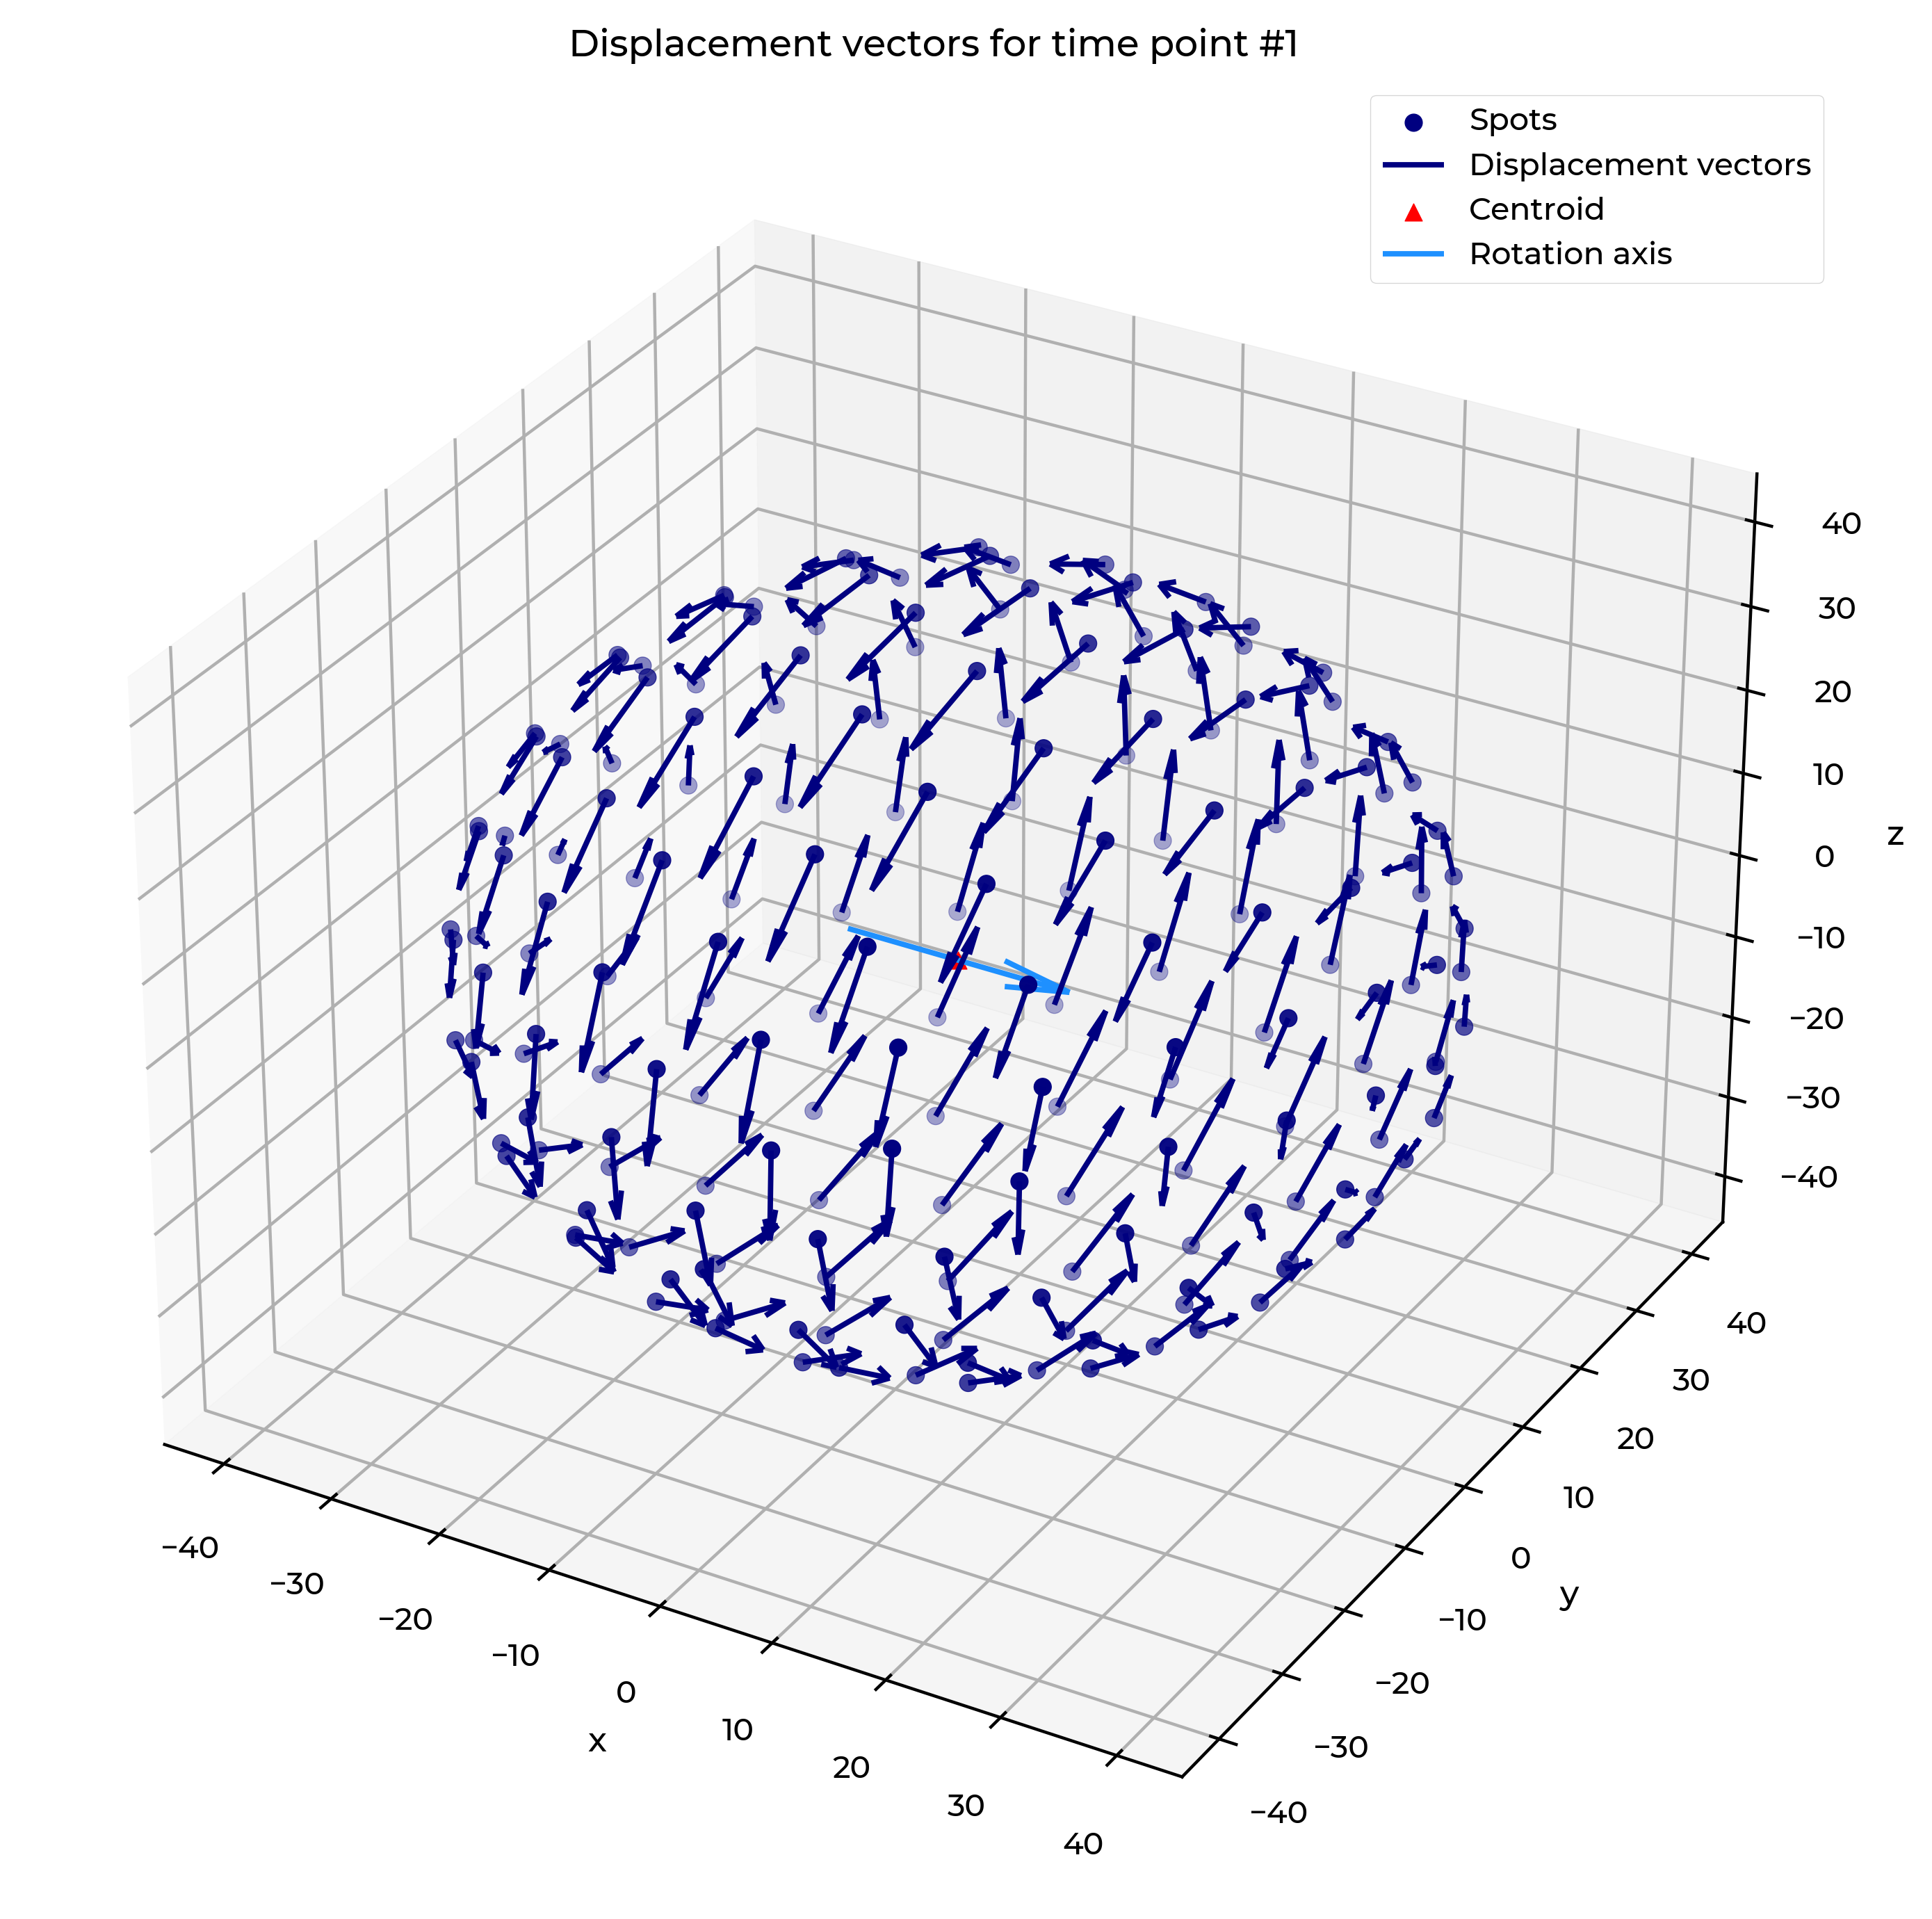

In [11]:
figures.show_data(df, TP = 1, data = data, mode = "centered")

Here, the rotation axis has been well computed.

## Aligning rotation axis with Z-axis (optional)
This method is here because of an old way of computing the angular velocity. Now it is not needed by OAT but it can still be useful.

In [12]:
df, data = vectors.get_aligned_rotation(df, data)
df.head()

Aligning rotation axis and Z axis ... Done ! (1.52s)


TRACK_ID  QUALITY                                              COORD  TP  \
ID0         0      0.0                              [-76.0, 116.0, -51.0]   0   
ID1         1      0.0  [-80.17113560587966, 115.59798994974877, -47.1...   0   
ID2         2      0.0  [-75.30237142257698, 115.19597989949747, -58.9...   0   
ID3         3      0.0  [-70.06880068856033, 114.79396984924622, -43.2...   0   
ID4         4      0.0  [-87.05589988605506, 114.39195979899498, -52.9...   0   

    TARGET                                       DISP_VECT  \
ID0  ID200   [0.0, -1.3629669484372755, 10.35276180410083]   
ID1  ID201   [0.0, -2.338242732023744, 10.118513057013544]   
ID2  ID202    [0.0, 0.7218124552243239, 10.41552571082839]   
ID3  ID203   [0.0, -3.3241481572747063, 9.777013636711033]   
ID4  ID204  [0.0, -0.8020192369520913, 10.003206953967286]   

                                          CENTRD_COORD  \
ID0  [0.022790375652562034, 40.0, 0.000804827403207...   
ID1  [-4.148345230227093, 39.597989949748765, 3.821...   
ID2  [0.7204189530755798, 39.19597989949747, -7.948...   
ID3  [5.953989687092232, 38.793969849246224, 7.7370...   
ID4  [-11.033109510402497, 38.391959798994975, -1.9...   

                                         ALIGNED_COORD  \
ID0  [0.0008048274032028558, -40.0, 0.0227903756525...   
ID1  [3.821906723055891, -39.597989949748765, -4.14...   
ID2  [-7.948312990704136, -39.19597989949747, 0.720...   
ID3  [7.7370040275112215, -38.793969849246224, 5.95...   
ID4  [-1.954828190798649, -38.391959798994975, -11....   

                                     ALIGNED_DISP_VECT  
ID0  [10.35276180410083, 1.3629669484372742, -6.339...  
ID1  [10.118513057013544, 2.3382427320237427, -6.19...  
ID2  [10.41552571082839, -0.7218124552243251, -6.37...  
ID3  [9.777013636711033, 3.324148157274705, -5.9866...  
ID4  [10.003206953967286, 0.8020192369520901, -6.12...

In [13]:
data.head()

CENTROID CLUST_CENTROID DRIFT  \
0     [-76.02279037565256, 76.0, -51.00080482740321]            NaN   0.0   
1  [-76.02279037565256, 76.00020830465998, -51.00...            NaN   0.0   
2  [-76.02279037565256, 76.00040241370161, -51.00...            NaN   0.0   
3  [-76.02279037565256, 76.00056909891448, -51.00...            NaN   0.0   
4  [-76.02279037565256, 76.00069700097684, -51.00...            NaN   0.0   

                                          DRIFT_VECT     VOLUME  RADIUS  \
0  [0.0, 0.00020830465997789815, 2.74238287616412...  260130.21    39.6   
1  [0.0, 0.00019410904162953102, 8.04025976108846...  260130.21    39.6   
2  [0.0, 0.00016668521287499516, 0.00012790206233...  260130.21    39.6   
3  [0.0, 0.00012790206235990809, 0.00016668521288...  260130.21    39.6   
4  [0.0, 8.040259761799007e-05, 0.000194109041636...  260130.21    39.6   

   CENTRD_CENTROID                                              V1  \
0  [0.0, 0.0, 0.0]  [0.0, -0.1615554882496425, 0.9868636299998189]   
1  [0.0, 0.0, 0.0]  [0.0, -0.4114697208420325, 0.9114234300423595]   
2  [0.0, 0.0, 0.0]  [0.0, -0.6333429719448985, 0.7738712295259488]   
3  [0.0, 0.0, 0.0]  [0.0, -0.8120549461584715, 0.5835809836000165]   
4  [0.0, 0.0, 0.0]  [0.0, -0.9354267177755822, 0.3535206580549452]   

                                                  V2  \
0   [-0.0, -0.9868636299998189, -0.1615554882496426]   
1   [-0.0, -0.9114234300423595, -0.4114697208420326]   
2   [-0.0, -0.7738712295259489, -0.6333429719448984]   
3   [-0.0, -0.5835809836000165, -0.8120549461584712]   
4  [-0.0, -0.35352065805494526, -0.9354267177755821]   

                           RA_VECT  \
0  [0.9999999999999999, 0.0, -0.0]   
1                 [1.0, 0.0, -0.0]   
2  [1.0000000000000002, 0.0, -0.0]   
3  [1.0000000000000004, 0.0, -0.0]   
4                 [1.0, 0.0, -0.0]   

                                    ALIGNED_RA_VECT   Theta_X   Theta_Y  
0  [6.123233995736765e-17, 0.0, 0.9999999999999999]  3.141593 -1.570796  
1                 [6.123233995736766e-17, 0.0, 1.0]  3.141593 -1.570796  
2  [6.123233995736767e-17, 0.0, 1.0000000000000002]  3.141593 -1.570796  
3  [6.123233995736769e-17, 0.0, 1.0000000000000004]  3.141593 -1.570796  
4                 [6.123233995736766e-17, 0.0, 1.0]  3.141593 -1.570796

In data, Theta_X and Theta_Y are the angles (in radian) of rotation  for their given axis. 

#### Checking data

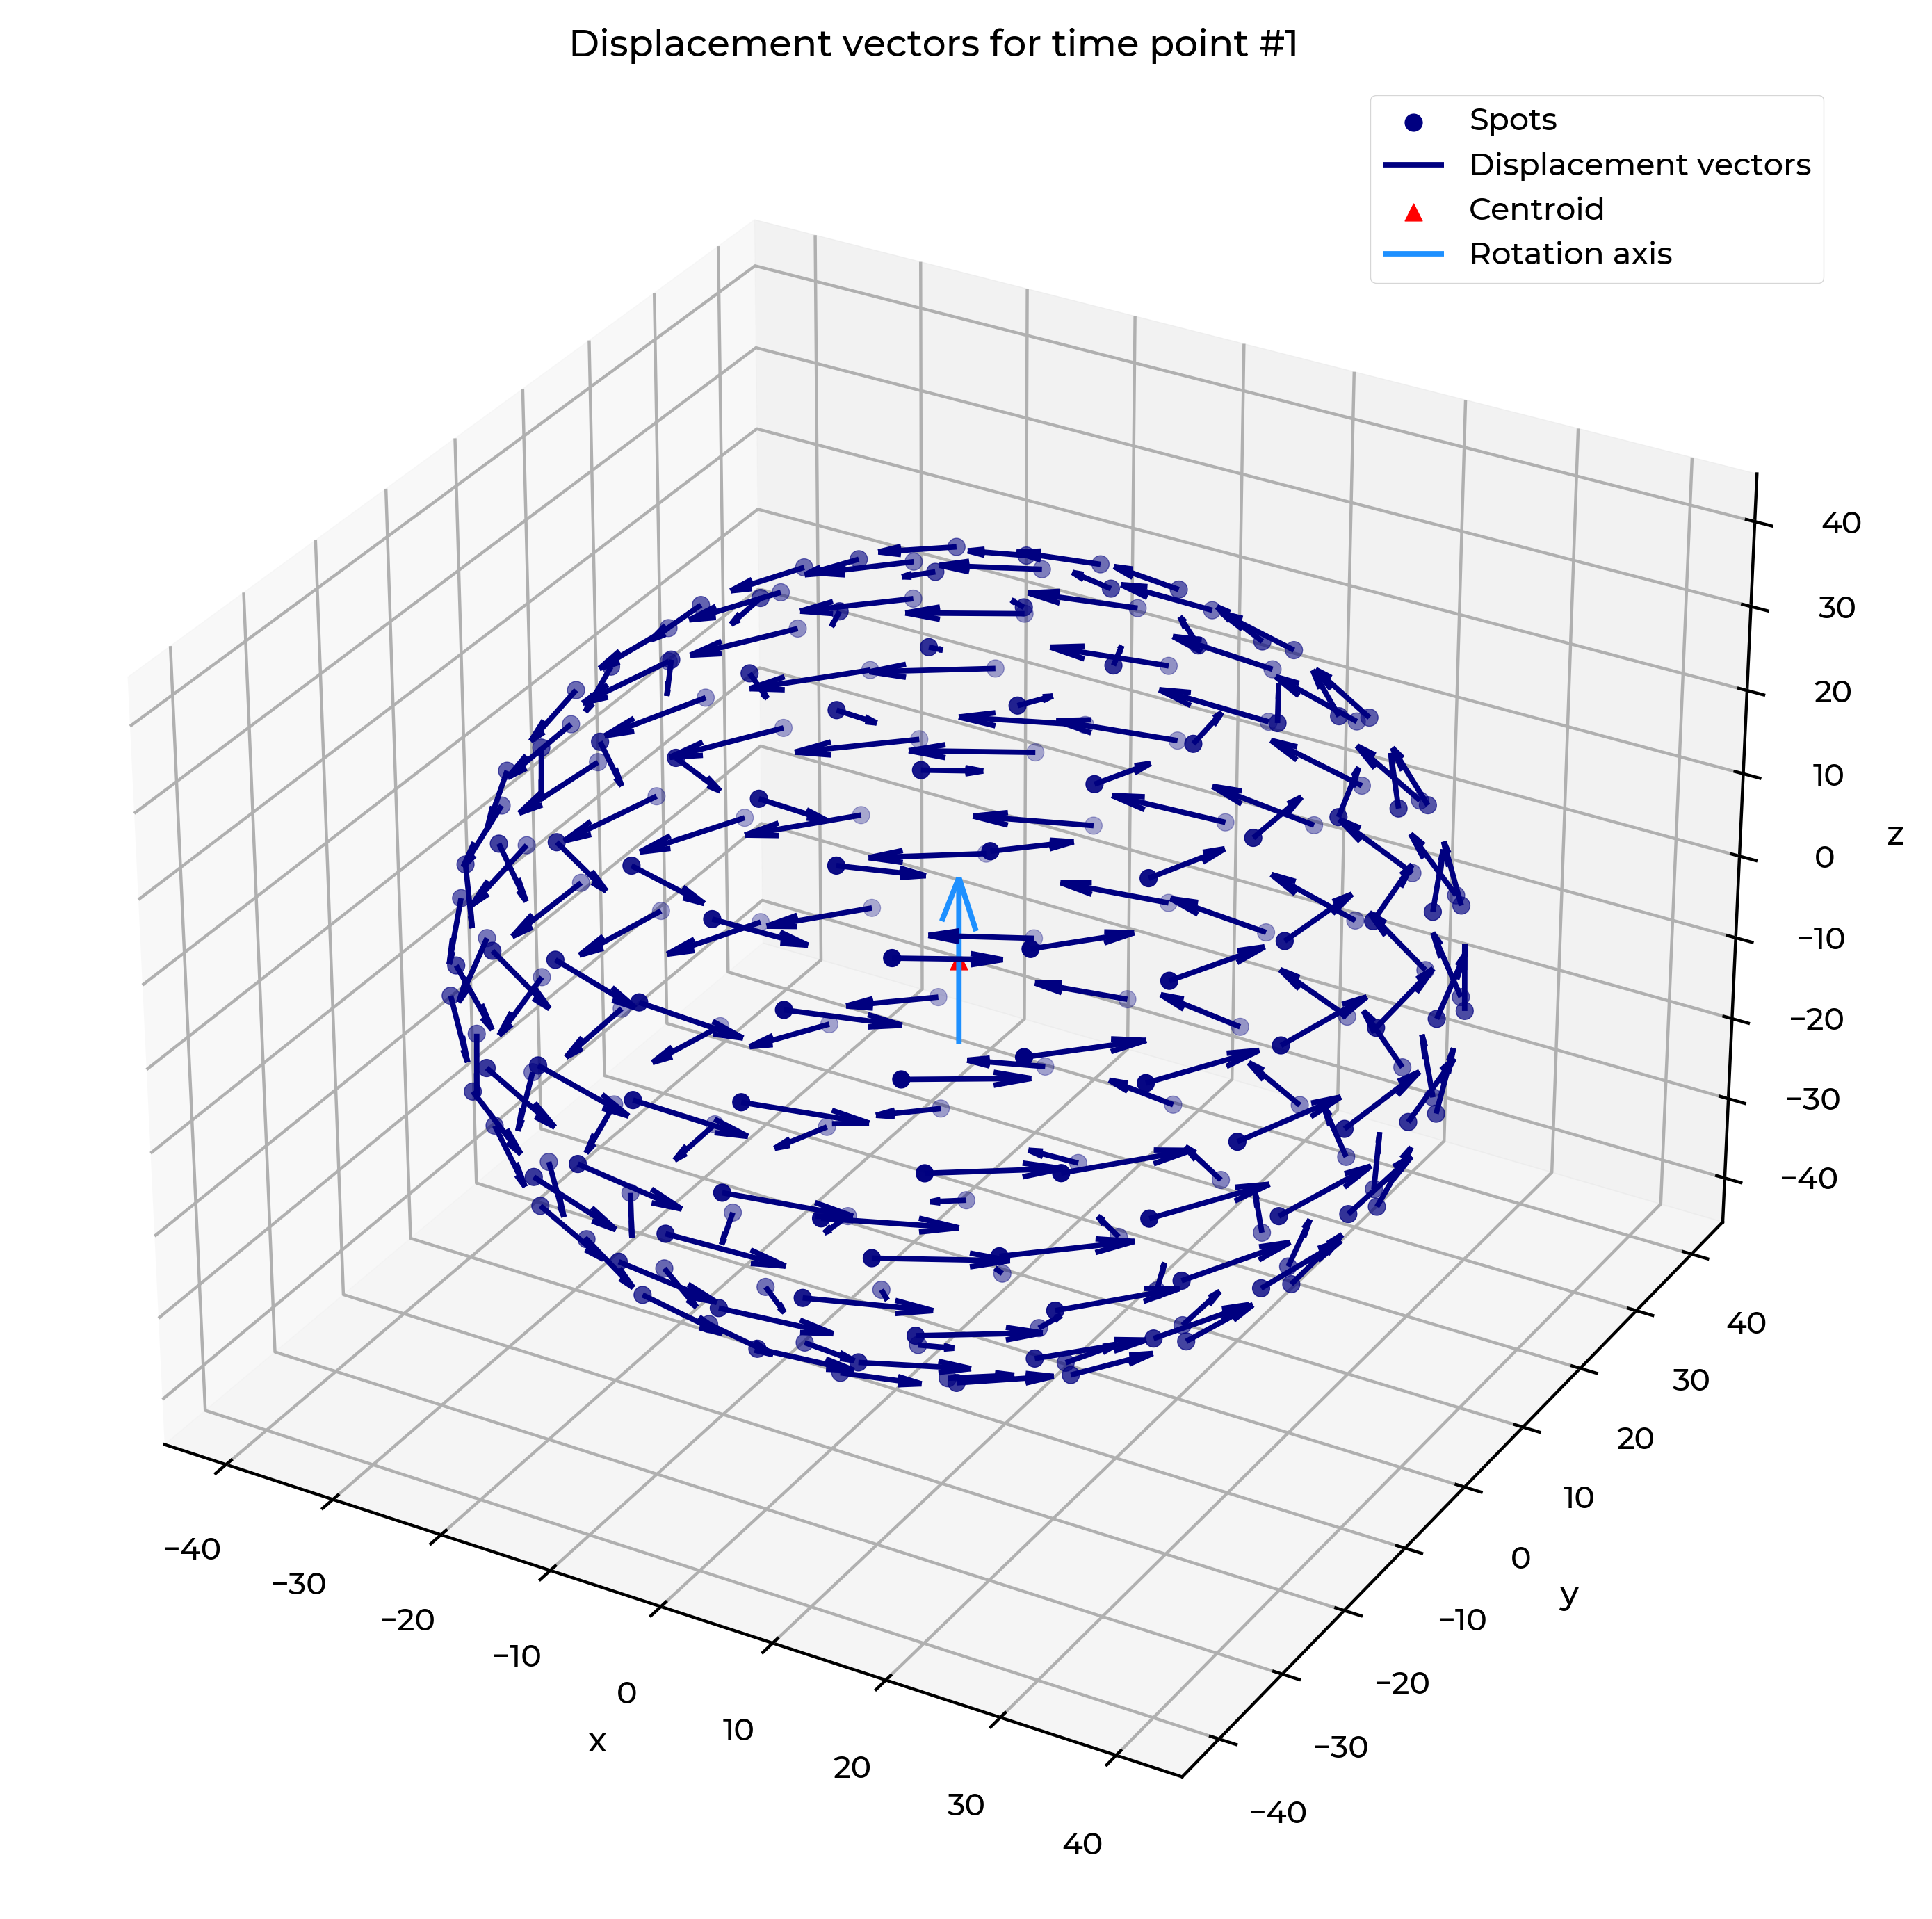

In [14]:
figures.show_data(df, TP = 1, data = data, mode = "aligned")

## Computing the angular velocity

In [15]:
df, data = vectors.get_angular_velocity(df, data)
df.head()

Computing angular velocity ... Done ! (14.43s)


TRACK_ID  QUALITY                                              COORD  TP  \
ID0         0      0.0                              [-76.0, 116.0, -51.0]   0   
ID1         1      0.0  [-80.17113560587966, 115.59798994974877, -47.1...   0   
ID2         2      0.0  [-75.30237142257698, 115.19597989949747, -58.9...   0   
ID3         3      0.0  [-70.06880068856033, 114.79396984924622, -43.2...   0   
ID4         4      0.0  [-87.05589988605506, 114.39195979899498, -52.9...   0   

    TARGET                                       DISP_VECT  \
ID0  ID200   [0.0, -1.3629669484372755, 10.35276180410083]   
ID1  ID201   [0.0, -2.338242732023744, 10.118513057013544]   
ID2  ID202    [0.0, 0.7218124552243239, 10.41552571082839]   
ID3  ID203   [0.0, -3.3241481572747063, 9.777013636711033]   
ID4  ID204  [0.0, -0.8020192369520913, 10.003206953967286]   

                                          CENTRD_COORD  \
ID0  [0.022790375652562034, 40.0, 0.000804827403207...   
ID1  [-4.148345230227093, 39.597989949748765, 3.821...   
ID2  [0.7204189530755798, 39.19597989949747, -7.948...   
ID3  [5.953989687092232, 38.793969849246224, 7.7370...   
ID4  [-11.033109510402497, 38.391959798994975, -1.9...   

                                         ALIGNED_COORD  \
ID0  [0.0008048274032028558, -40.0, 0.0227903756525...   
ID1  [3.821906723055891, -39.597989949748765, -4.14...   
ID2  [-7.948312990704136, -39.19597989949747, 0.720...   
ID3  [7.7370040275112215, -38.793969849246224, 5.95...   
ID4  [-1.954828190798649, -38.391959798994975, -11....   

                                     ALIGNED_DISP_VECT                 R_VECT  \
ID0  [10.35276180410083, 1.3629669484372742, -6.339...     [0.0, 40.0, 0.001]   
ID1  [10.118513057013544, 2.3382427320237427, -6.19...   [0.0, 39.598, 3.822]   
ID2  [10.41552571082839, -0.7218124552243251, -6.37...  [0.0, 39.196, -7.948]   
ID3  [9.777013636711033, 3.324148157274705, -5.9866...   [0.0, 38.794, 7.737]   
ID4  [10.003206953967286, 0.8020192369520901, -6.12...  [0.0, 38.392, -1.955]   

          R              AV_VECT  AV_RAD  AV_DEG  
ID0  40.000   [0.259, 0.0, -0.0]   0.259  14.829  
ID1  39.782   [0.259, 0.0, -0.0]   0.259  14.829  
ID2  39.994   [0.259, -0.0, 0.0]   0.259  14.829  
ID3  39.558   [0.259, 0.0, -0.0]   0.259  14.829  
ID4  38.442  [0.259, -0.0, -0.0]   0.259  14.829

In [16]:
data.head()

CENTROID CLUST_CENTROID DRIFT  \
0     [-76.02279037565256, 76.0, -51.00080482740321]            NaN   0.0   
1  [-76.02279037565256, 76.00020830465998, -51.00...            NaN   0.0   
2  [-76.02279037565256, 76.00040241370161, -51.00...            NaN   0.0   
3  [-76.02279037565256, 76.00056909891448, -51.00...            NaN   0.0   
4  [-76.02279037565256, 76.00069700097684, -51.00...            NaN   0.0   

                                          DRIFT_VECT     VOLUME  RADIUS  \
0  [0.0, 0.00020830465997789815, 2.74238287616412...  260130.21    39.6   
1  [0.0, 0.00019410904162953102, 8.04025976108846...  260130.21    39.6   
2  [0.0, 0.00016668521287499516, 0.00012790206233...  260130.21    39.6   
3  [0.0, 0.00012790206235990809, 0.00016668521288...  260130.21    39.6   
4  [0.0, 8.040259761799007e-05, 0.000194109041636...  260130.21    39.6   

   CENTRD_CENTROID                                              V1  \
0  [0.0, 0.0, 0.0]  [0.0, -0.1615554882496425, 0.9868636299998189]   
1  [0.0, 0.0, 0.0]  [0.0, -0.4114697208420325, 0.9114234300423595]   
2  [0.0, 0.0, 0.0]  [0.0, -0.6333429719448985, 0.7738712295259488]   
3  [0.0, 0.0, 0.0]  [0.0, -0.8120549461584715, 0.5835809836000165]   
4  [0.0, 0.0, 0.0]  [0.0, -0.9354267177755822, 0.3535206580549452]   

                                                  V2  \
0   [-0.0, -0.9868636299998189, -0.1615554882496426]   
1   [-0.0, -0.9114234300423595, -0.4114697208420326]   
2   [-0.0, -0.7738712295259489, -0.6333429719448984]   
3   [-0.0, -0.5835809836000165, -0.8120549461584712]   
4  [-0.0, -0.35352065805494526, -0.9354267177755821]   

                           RA_VECT  \
0  [0.9999999999999999, 0.0, -0.0]   
1                 [1.0, 0.0, -0.0]   
2  [1.0000000000000002, 0.0, -0.0]   
3  [1.0000000000000004, 0.0, -0.0]   
4                 [1.0, 0.0, -0.0]   

                                    ALIGNED_RA_VECT   Theta_X   Theta_Y  \
0  [6.123233995736765e-17, 0.0, 0.9999999999999999]  3.141593 -1.570796   
1                 [6.123233995736766e-17, 0.0, 1.0]  3.141593 -1.570796   
2  [6.123233995736767e-17, 0.0, 1.0000000000000002]  3.141593 -1.570796   
3  [6.123233995736769e-17, 0.0, 1.0000000000000004]  3.141593 -1.570796   
4                 [6.123233995736766e-17, 0.0, 1.0]  3.141593 -1.570796   

   MEAN_AV        STD_AV  
0    0.259  2.782523e-16  
1    0.259  2.782523e-16  
2    0.259  2.782523e-16  
3    0.259  2.782523e-16  
4    0.259  2.782523e-16

In df, you have the angular velocity for each spots.
In data, you have the mean angular velocity for the time point.

## Drawing the final graph of OAT

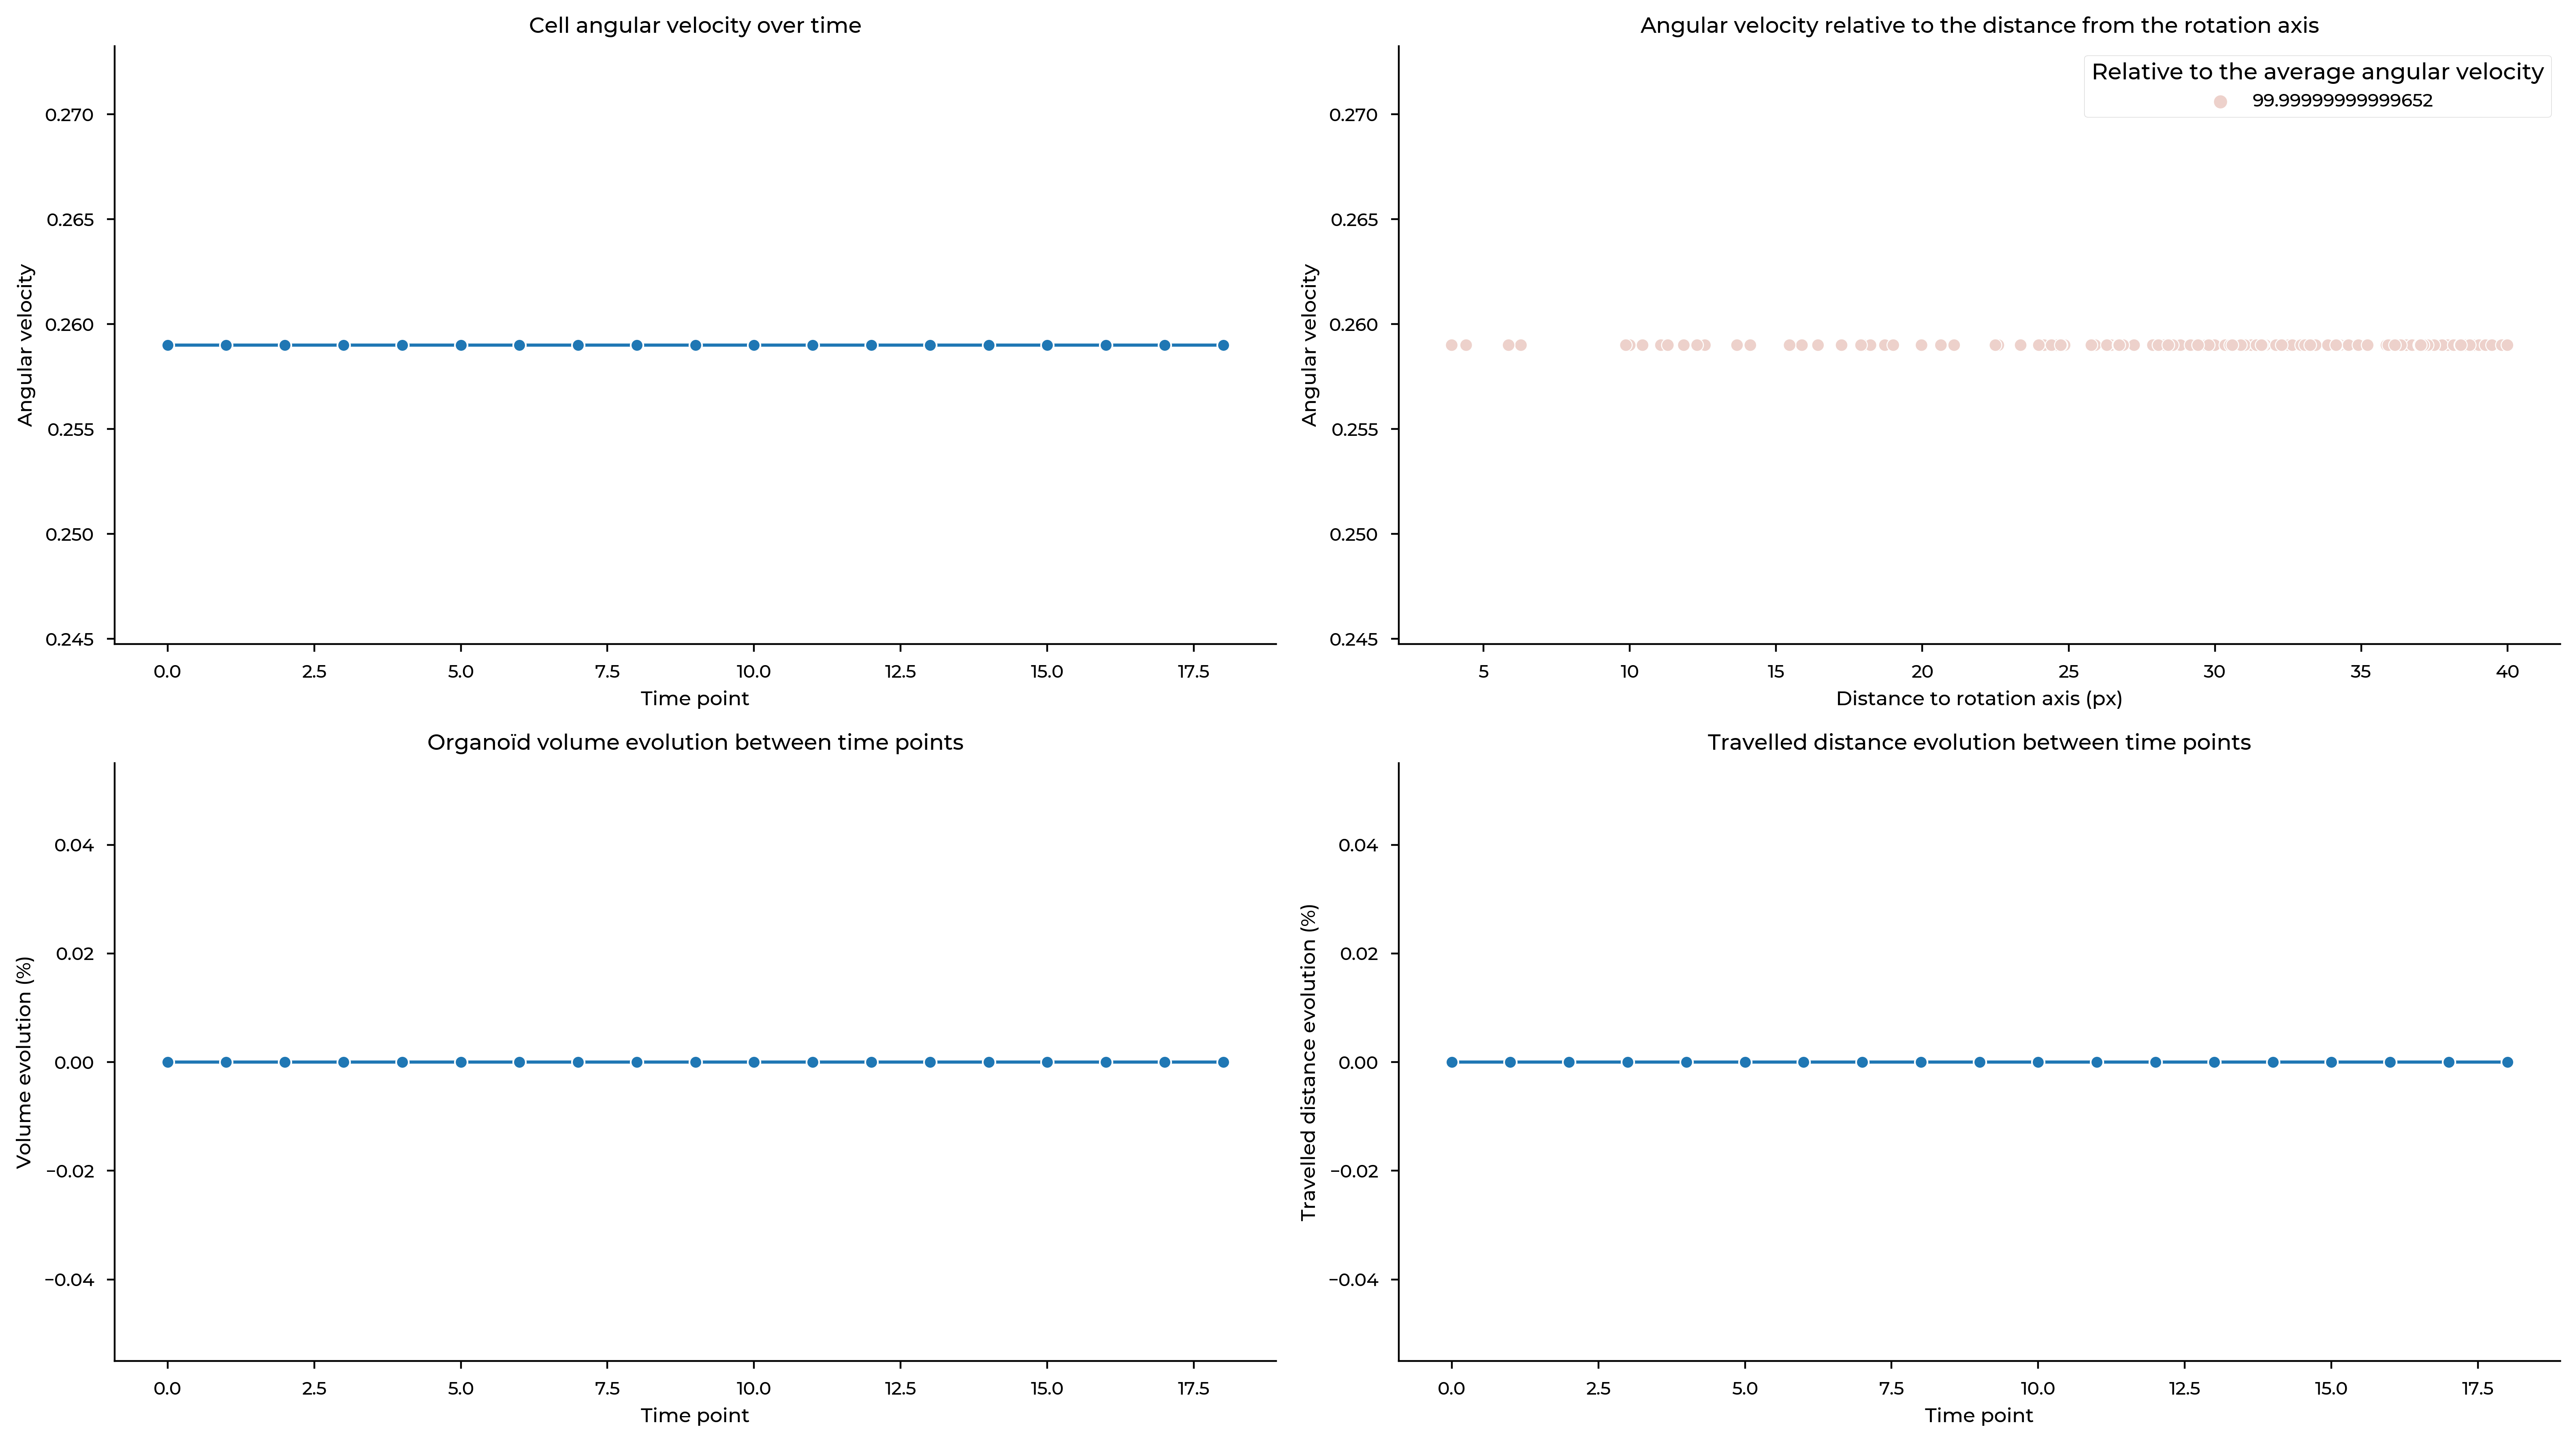

In [17]:
figures.show_angular_velocity(df, data)

Here, everything is just a flat line but it is expected since the angular velocity is fixed at 15 degree the volume is fixed and the whole organoid do not drift.
You can specify a savepath for each of the figures method to save them.

## Exporting the results

### To csv
Exporting to csv is done using export.to_csv, method of the export module.
It takes the dataframe to export and the fullpath to the .csv file.
OAT uses arrays as values for columns such as coordinates, displacement vectors, etc... but arrays are not available in csv files so they are splitted into 3 columns whose names are the original column name where the axis is added. For example, arrays from the "COORD" column will be splitted into "COORD_X", "COORD_Y" and "COORD_Z".
Here is an example :

In [18]:
export.to_csv(df, savepath = r"export/advanced/tracks.csv")

### To vtk

You can export trajectories of cells in a vtk files using export.to_vtk_polydata. Note that this method create a .vtk file containing actual trajectories between spots.
This method works only on coordinates columns (or vectors columns but that would be non-sense in the end).
Here is an example :

In [19]:
export.to_vtk_polydata(df, savepath = r"export/advanced/trajectories.vtk", column_name = "COORD", clusters_only = False)

.vtk files can be opened by Paraview for example and allows you to more clearly see the trajectories.

## Bonus

All methods used in the vectors module are "smarter" version of methods in the compute module. They are smarter because they do a quick check to see if the required columns are present in the dataframe(s). But you can achieve the same results as in this demo using the barebone methods.
One advantage in using them other the smarter ones is the ability to use custom column names. The methods will ask for the names of the required coordinates or vectors column(s) so you are not forced to rename them columns if you use those methods.  

With that, this is the end of the advanced demo :)